## Salary Hike Prediction model

### import Data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [3]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

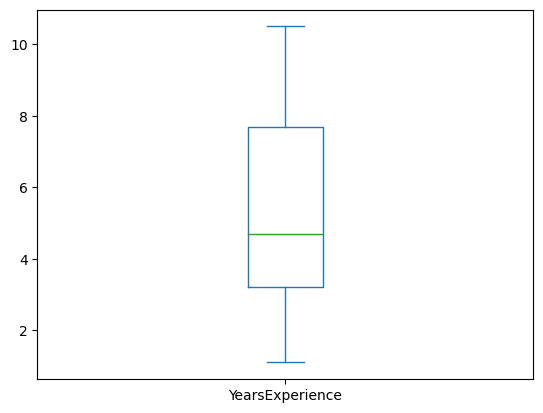

In [3]:
data.YearsExperience.plot(kind="box")

### Correlation

Text(0, 0.5, 'Salary')

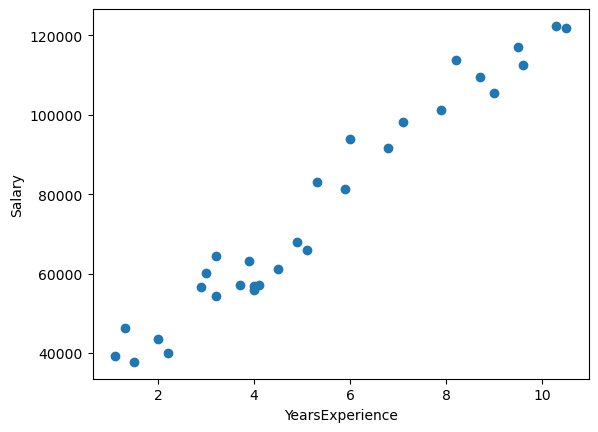

In [7]:
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel('YearsExperience')
plt.ylabel("Salary")

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


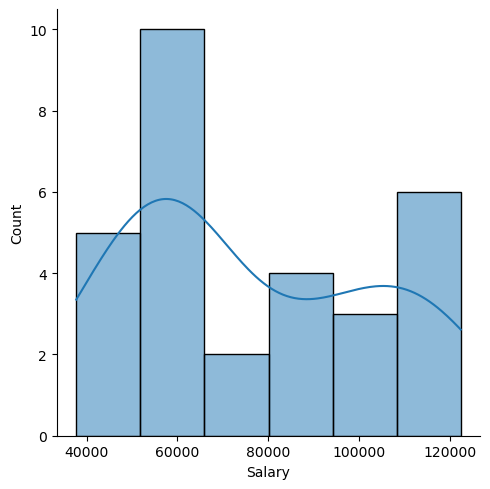

In [12]:
sns.displot(data["Salary"], kde='true')

/var/folders/d7/624qzhlx7051pksqzldlx5fh0000gn/T/ipykernel_2950/2929892231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

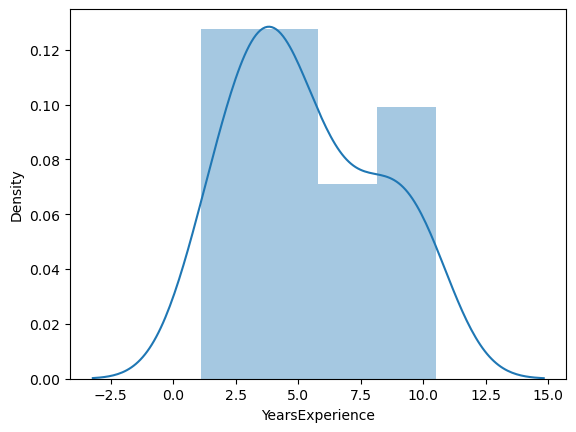

In [13]:
sns.distplot(data["YearsExperience"])

### Fitting a linear Regression model

#### Building Model

In [15]:
model = smf.ols("Salary~YearsExperience", data = data).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        16:33:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Testing

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

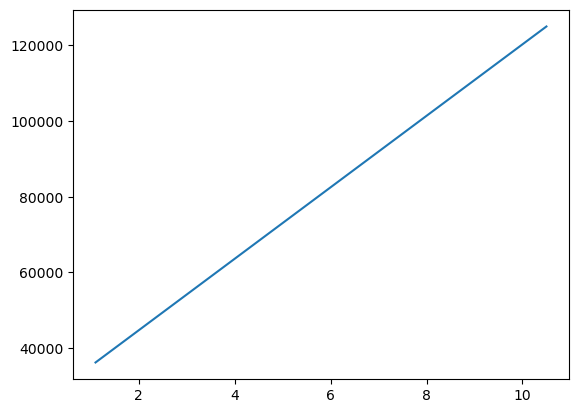

In [32]:
plt.plot(data.YearsExperience,model.fittedvalues)
model.fittedvalues

In [33]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

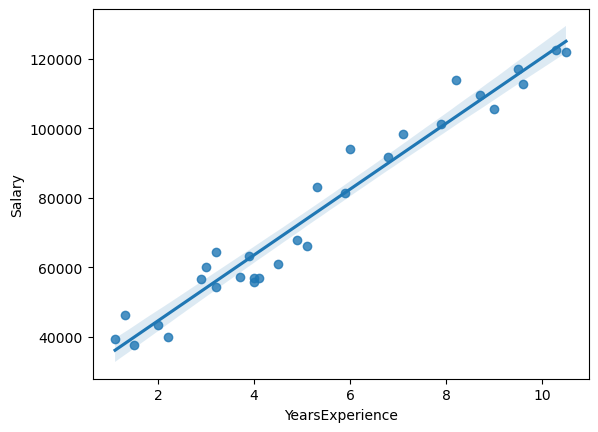

In [35]:
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [36]:
#coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [40]:
# t and p-values
print(model.tvalues, '\n', '\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [41]:
# R Squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Predict for new data point

In [19]:
newdata = pd.Series([5, 8, 9, 3])

In [20]:
data_pred =pd.DataFrame(newdata, columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,8
2,9
3,3


In [21]:
model.predict(data_pred)

0     73042.011806
1    101391.898770
2    110841.861092
3     54142.087163
dtype: float64

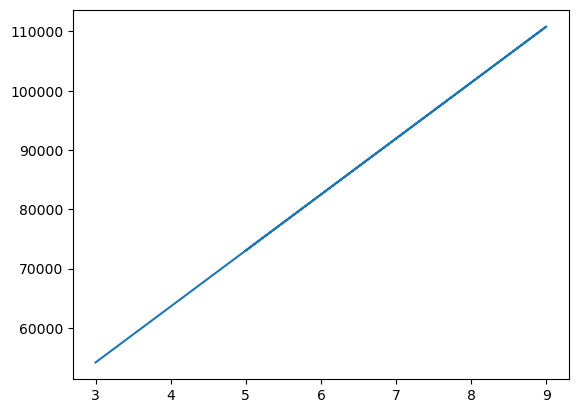

In [22]:
plt.plot(data_pred.YearsExperience,model.predict(data_pred))